Aizhan Borubaeva

Prediction with Machine Learning for Economists

2023/24 Fall

Assignment 2

Below you can find the code for Assignment 2.

1. Importing packages:

In [92]:
import requests
import pandas as pd
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
import gzip
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
!pip install shap
import shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/f5/fc/e81722d6bec4fcba46e46ef895eddaeab0027ac71e78fc35ef351fac5fe4/shap-0.43.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/447.3 kB ? eta -:--:--
   -------------------------------- ------ 368.6/447.3 kB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 447.3/447.3 kB 9.5 MB/s eta 0:00:00


2. Scraping:

In [2]:
url = "http://data.insideairbnb.com/france/ile-de-france/paris/2022-12-10/data/listings.csv.gz"
response = requests.get(url)
if response.status_code == 200:
    compressed_data = BytesIO(response.content)
    with gzip.GzipFile(fileobj=compressed_data, mode='rb') as f:
        December2022_data = pd.read_csv(f)
    print(December2022_data.head())
else:
    print(f"Error: {response.status_code}")

      id                         listing_url       scrape_id last_scraped  \
0   5396   https://www.airbnb.com/rooms/5396  20221210143007   2022-12-11   
1   7397   https://www.airbnb.com/rooms/7397  20221210143007   2022-12-11   
2   7964   https://www.airbnb.com/rooms/7964  20221210143007   2022-12-11   
3   9359   https://www.airbnb.com/rooms/9359  20221210143007   2022-12-11   
4  81870  https://www.airbnb.com/rooms/81870  20221210143007   2022-12-11   

            source                                             name  \
0      city scrape                   Explore the heart of old Paris   
1      city scrape                 MARAIS - 2ROOMS APT - 2/4 PEOPLE   
2  previous scrape                Large & sunny flat with balcony !   
3      city scrape  Cozy, Central Paris: WALK or VELIB EVERYWHERE !   
4  previous scrape                      Saint Germain Musee d'orsay   

                                         description  \
0  Cozy, well-appointed and graciously designed s...  

3) Browsing data

In [3]:
print(December2022_data.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

4) Dropping missing variables for price and dropping unnecessary collumns

In [4]:
December2022_data.dropna(subset=['price'], inplace=True)

In [5]:
December2022_data = December2022_data.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id', 'bedrooms',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_thumbnail_url', 'host_picture_url','host_neighbourhood',
       'host_total_listings_count', 'host_verifications','host_has_profile_pic', 
       'host_identity_verified', 'neighbourhood', 'neighbourhood_group_cleansed',
       'latitude', 'longitude','bathrooms', 'bathrooms_text', 'amenities', 
       'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
       'calendar_updated', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'first_review', 'last_review', 
       'calendar_last_scraped', 'number_of_reviews_l30d', 'license' ], axis=1)

5) Browse left columns

In [6]:
print(December2022_data.columns)

Index(['host_is_superhost', 'host_listings_count', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'accommodates', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')


6. Check room types, dropping unnecessary

In [7]:
print(December2022_data['room_type'].value_counts())

room_type
Entire home/apt    46785
Private room        7048
Hotel room           985
Shared room          286
Name: count, dtype: int64


In [8]:
December2022_data = December2022_data[December2022_data['room_type'] == 'Entire home/apt']

In [10]:
print(December2022_data['room_type'].value_counts())

room_type
Entire home/apt    46785
Name: count, dtype: int64


In [11]:
December2022_data = December2022_data.drop(['room_type'], axis=1)

7. Keep only data for accomodates from 2 till 6 according to assignment instructions, keep 'property_type' == 'Entire rental unit' or 'Entire condo' or 'Entire loft' or 'Entire serviced apartment'

In [12]:
December2022_data = December2022_data[(December2022_data['accommodates'] >= 2) & (December2022_data['accommodates'] <= 6)]

In [13]:
print(December2022_data['property_type'].value_counts())

property_type
Entire rental unit           40360
Entire condo                  2185
Entire loft                    843
Entire serviced apartment      383
Entire home                    179
Entire townhouse               119
Entire vacation home            46
Room in aparthotel              38
Entire place                    27
Entire guesthouse               21
Entire guest suite              15
Tiny home                       15
Entire villa                     9
Boat                             6
Entire home/apt                  4
Houseboat                        3
Room in boutique hotel           2
Casa particular                  2
Cave                             1
Entire bed and breakfast         1
Earthen home                     1
Island                           1
Camper/RV                        1
Entire bungalow                  1
Bus                              1
Entire cabin                     1
Name: count, dtype: int64


In [16]:
December2022_data = December2022_data[
    (December2022_data['property_type'] == 'Entire rental unit') |
    (December2022_data['property_type'] == 'Entire condo') |
    (December2022_data['property_type'] == 'Entire loft') |
    (December2022_data['property_type'] == 'Entire serviced apartment')]

In [17]:
print(December2022_data['price'].value_counts())

price
$100.00      1741
$80.00       1571
$90.00       1478
$70.00       1382
$120.00      1372
             ... 
$849.00         1
$945.00         1
$978.00         1
$1,983.00       1
$2,038.00       1
Name: count, Length: 968, dtype: int64


In [18]:
print(December2022_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 43771 entries, 0 to 55103
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_is_superhost                             43770 non-null  object 
 1   host_listings_count                           43756 non-null  float64
 2   neighbourhood_cleansed                        43771 non-null  object 
 3   property_type                                 43771 non-null  object 
 4   accommodates                                  43771 non-null  int64  
 5   beds                                          43451 non-null  float64
 6   price                                         43771 non-null  object 
 7   minimum_nights                                43771 non-null  int64  
 8   maximum_nights                                43771 non-null  int64  
 9   has_availability                              43771 non-null  obje

8. Fill NaN values

In [19]:
for var in ["flag_review_scores_rating"]:
    December2022_data[var] = [int(x) for x in  December2022_data[var.replace("flag_review", "review")].isna()]

In [21]:
December2022_data.loc[:, "review_scores_rating"] = December2022_data["review_scores_rating"].fillna(np.nanmedian(December2022_data["review_scores_rating"]))

In [22]:
print(December2022_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 43771 entries, 0 to 55103
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_is_superhost                             43770 non-null  object 
 1   host_listings_count                           43756 non-null  float64
 2   neighbourhood_cleansed                        43771 non-null  object 
 3   property_type                                 43771 non-null  object 
 4   accommodates                                  43771 non-null  int64  
 5   beds                                          43451 non-null  float64
 6   price                                         43771 non-null  object 
 7   minimum_nights                                43771 non-null  int64  
 8   maximum_nights                                43771 non-null  int64  
 9   has_availability                              43771 non-null  obje

In [23]:
print(December2022_data['flag_review_scores_rating'].describe())

count    43771.000000
mean         0.182838
std          0.386538
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: flag_review_scores_rating, dtype: float64


9. Sorting price, overview, drop extreme values

In [24]:
December2022_data['price'] = December2022_data['price'].replace('[\$,]', '', regex=True).astype(float)
print(December2022_data['price'].head())

0     93.0
1    119.0
2    130.0
4    145.0
5    140.0
Name: price, dtype: float64


In [25]:
print(December2022_data['price'].describe())

count    43771.000000
mean       157.960625
std        581.055713
min          9.000000
25%         77.000000
50%        110.000000
75%        167.000000
max      99140.000000
Name: price, dtype: float64


In [26]:
December2022_data = December2022_data[(December2022_data['price'] <= 1500)]

In [27]:
December2022_data["beds"] = December2022_data["beds"].fillna(December2022_data["accommodates"])

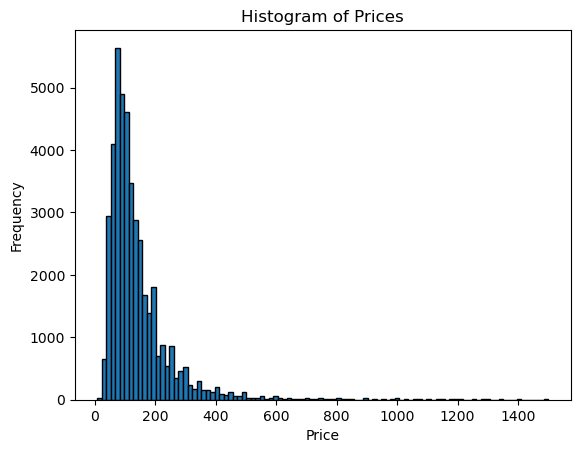

In [28]:
plt.hist(December2022_data['price'], bins=100, edgecolor='black')
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

10. Create dummies for categorical variables

In [31]:
categorical_columns = December2022_data.select_dtypes(include='object').columns
December2022_data = pd.get_dummies(December2022_data, columns=categorical_columns, drop_first=True)

11. Change all data to numeric variables to avoid data errors later, dropped missing variables to avoid future errors in models (Random Forest, Boosting)


In [33]:
December2022_data_numeric = December2022_data.apply(pd.to_numeric, errors='coerce')
December2022_data_numeric = December2022_data_numeric.dropna()

In [34]:
print(December2022_data.columns)
print(December2022_data.head)

Index(['host_listings_count', 'accommodates', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'flag_review_scores_rating', 'host_is_superhost_t',
       'neighbourhood_cleansed_Bourse',
       'neighbourhood_cleansed_Buttes-Chaumont',
       'neighbourhood_cleansed_Buttes-Montmartre',
       'neighbourhood_cleansed_Entrepôt', 'neighbourhood_cleansed_Gobelins',
       'neighbourhood_cleansed_Hôtel-de-Ville',
       'neighbourhood_cleansed_Louvre', 'neighbourhood_cleansed_Luxembourg',
       'ne

In [35]:
December2022_data = December2022_data.dropna()
print(len(December2022_data))

35218


12. Used random seed and split data to training and test datasets 

In [ ]:
np.random.seed(20180123)

In [37]:
train_data_December, test_data_December = train_test_split(December2022_data, test_size=0.2, random_state=20)
print(len(train_data_December)) #for checking

28174


In [38]:
train_data_December.describe()

,host_listings_count,accommodates,beds,price,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,flag_review_scores_rating
count,28174.000000,28174.000000,28174.000000,28174.000000,28174.000000,28174.000000,28174.000000,28174.000000,28174.000000,28174.000000,...,28174.000000,28174.000000,28174.000000,28174.000000,28174.000000,28174.000000,28174.000000,28174.000000,28174.000000,28174.0
mean,17.200575,3.067580,1.685029,142.816429,78.477994,660.432384,27.673919,8.331511,4.665093,4.756831,...,4.782066,4.800564,4.804288,4.599861,11.129943,11.055761,0.054163,0.000568,1.031549,0.0
std,74.152677,1.252596,0.878502,116.835912,144.737168,707.147164,47.341196,13.052243,0.449726,0.410277,...,0.412846,0.403729,0.339095,0.463386,35.044186,34.930077,0.559312,0.025270,1.267079,0.0
min,1.000000,2.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.010000,0.0
25%,1.000000,2.000000,1.000000,79.000000,2.000000,62.000000,4.000000,0.000000,4.530000,4.680000,...,4.750000,4.760000,4.750000,4.500000,1.000000,1.000000,0.000000,0.000000,0.170000,0.0
50%,1.000000,2.000000,1.000000,110.000000,3.000000,1125.000000,11.000000,3.000000,4.790000,4.880000,...,4.920000,4.940000,4.910000,4.710000,1.000000,1.000000,0.000000,0.000000,0.560000,0.0
75%,2.000000,4.000000,2.000000,168.000000,30.000000,1125.000000,30.000000,11.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,4.880000,1.000000,1.000000,0.000000,0.000000,1.390000,0.0
max,1852.000000,6.000000,9.000000,1500.000000,1000.000000,85554.000000,688.000000,197.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,358.000000,358.000000,29.000000,2.000000,20.520000,0.0


13. Created feols models to choose the best for final OLS and calculated RMSE and R-squared:

In [40]:
from pyfixest.estimation import feols
from pyfixest.utils import get_data

In [41]:
model_1 = feols(fml="price~host_listings_count+accommodates+beds", data=train_data_December, vcov="HC1")

model_2 = feols(fml="price~host_listings_count+accommodates+beds+minimum_nights+maximum_nights+number_of_reviews+number_of_reviews_ltm+review_scores_rating+review_scores_accuracy+review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location+review_scores_value", data=train_data_December, vcov="HC1")

model_3 = feols(fml="price~host_listings_count+accommodates+beds+minimum_nights+maximum_nights+number_of_reviews+number_of_reviews_ltm+review_scores_rating+review_scores_accuracy+review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location+review_scores_value+calculated_host_listings_count+calculated_host_listings_count_entire_homes+calculated_host_listings_count_private_rooms+calculated_host_listings_count_shared_rooms+reviews_per_month+host_is_superhost_t+ has_availability_t+instant_bookable_t", data=train_data_December, vcov="HC1")


In [42]:
print(model_1.summary())
print(model_2.summary())
print(model_3.summary())


###

Estimation:  OLS
Dep. var.: price
Inference:  HC1
Observations:  28174

| Coefficient         |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5 % |   97.5 % |
|:--------------------|-----------:|-------------:|----------:|-----------:|--------:|---------:|
| Intercept           |     26.201 |        1.798 |    14.576 |      0.000 |  22.678 |   29.725 |
| host_listings_count |      0.179 |        0.022 |     8.208 |      0.000 |   0.136 |    0.222 |
| accommodates        |     29.246 |        0.964 |    30.330 |      0.000 |  27.356 |   31.136 |
| beds                |     14.137 |        1.407 |    10.047 |      0.000 |  11.379 |   16.895 |
---
RMSE: 105.913  Adj. R2: 0.178  Adj. R2 Within: 0.178
None
###

Estimation:  OLS
Dep. var.: price
Inference:  HC1
Observations:  28174

| Coefficient                 |   Estimate |   Std. Error |   t value |   Pr(>|t|) |    2.5 % |   97.5 % |
|:----------------------------|-----------:|-------------:|----------:|-----------:|-----

14. Create OLS Model, Randon Forest and Gradient Boosting

In [43]:
X_train_December = train_data_December.drop('price', axis=1)
y_train_December = train_data_December['price']

X_test_December = test_data_December.drop('price', axis=1)
y_test_December = test_data_December['price']

# Create and train the OLS regression model
model_ols_December = LinearRegression()
model_ols_December.fit(X_train_December, y_train_December)

# Predict on the test set
y_pred_ols_December = model_ols_December.predict(X_test_December)

# Calculate and print the Mean Squared Error
mse_ols_December = mean_squared_error(y_test_December, y_pred_ols_December)
print(f'MSE for OLS: {mse_ols_December}')

MSE for OLS: 9355.873376226149


In [44]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest regression model
model_rf_December = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_December.fit(X_train_December, y_train_December)

# Predict on the test set
y_pred_rf_December = model_rf_December.predict(X_test_December)

# Calculate and print the Mean Squared Error
mse_rf_December = mean_squared_error(y_test_December, y_pred_rf_December)
print(f'MSE for Random Forest: {mse_rf_December}')

MSE for Random Forest: 7318.78282965798


In [45]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb_December = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb_December.fit(X_train_December, y_train_December)

# Predict on the test set
y_pred_gb_December = model_gb_December.predict(X_test_December)

# Calculate and print the Mean Squared Error
mse_gb_December = mean_squared_error(y_test_December, y_pred_gb_December)
print(f'MSE for Gradient Boosting: {mse_gb_December}')

MSE for Gradient Boosting: 7126.205910638168


In [47]:
results_df_December = pd.DataFrame(index=['Linear Regression', 'Random Forest', 'Gradient Boosting'])

# Calculate metrics for each model
for model, y_pred_December, name in zip([model_ols_December, model_rf_December, model_gb_December],
                               [y_pred_ols_December, y_pred_rf_December, y_pred_gb_December],
                               results_df_December.index):
# Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test_December, y_pred_December))

# Calculate R-squared
    r_squared = r2_score(y_test_December, y_pred_December)
    
# Update the results DataFrame
    results_df_December.loc[name, 'RMSE'] = rmse
    results_df_December.loc[name, 'R-squared'] = r_squared
    
# Print the results DataFrame
print(results_df_December)

                        RMSE  R-squared
Linear Regression  96.725764   0.336366
Random Forest      85.549885   0.480862
Gradient Boosting  84.416858   0.494521


15. calculated BIC manually:

In [49]:
n = len(y_test_December)
sse = np.sum((y_test_December - y_pred_December) ** 2)

# Assuming X_test is your feature matrix for the linear model
k = X_test_December.shape[1] 

# Calculate BIC
bic_manual = n * np.log(sse / n) + k * np.log(n)

# Update the results DataFrame
results_df_December.loc['Linear Regression', 'BIC'] = bic_manual


In [51]:
# Calculate BIC for Random Forest
y_pred_rf_December = model_rf_December.predict(X_test_December)
sse_rf = np.sum((y_test_December - y_pred_rf_December) ** 2)
k_rf = X_test_December.shape[1]
bic_rf = n * np.log(sse_rf / n) + k_rf * np.log(n)
results_df_December.loc['Random Forest', 'BIC'] = bic_rf

# Calculate BIC for Gradient Boosting
y_pred_gb_December = model_gb_December.predict(X_test_December)
sse_gb = np.sum((y_test_December - y_pred_gb_December) ** 2)
k_gb = X_test_December.shape[1] 
bic_gb = n * np.log(sse_gb / n) + k_gb * np.log(n)
results_df_December.loc['Gradient Boosting', 'BIC'] = bic_gb

In [53]:
print(results_df_December)

                        RMSE  R-squared           BIC
Linear Regression  96.725764   0.336366  62889.784113
Random Forest      85.549885   0.480862  63077.612877
Gradient Boosting  84.416858   0.494521  62889.784113


16. Graph

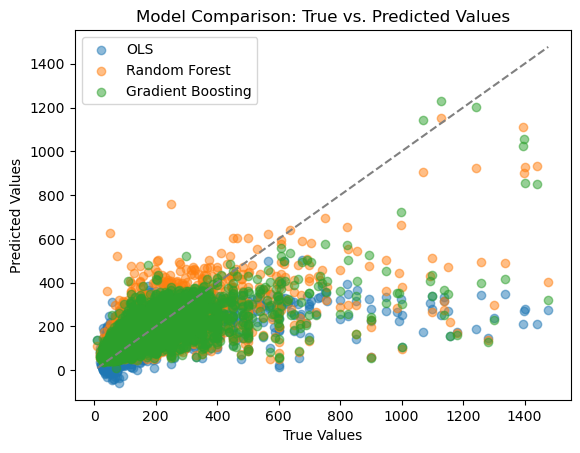

In [55]:
from plotnine import ggplot, aes, geom_line, scale_color_manual, scale_y_continuous, scale_x_discrete, theme_bw

plt.scatter(y_test_December, y_pred_ols_December, label='OLS', alpha=0.5)

# Scatter plot for Random Forest
plt.scatter(y_test_December, y_pred_rf_December, label='Random Forest', alpha=0.5)

# Scatter plot for Gradient Boosting
plt.scatter(y_test_December, y_pred_gb_December, label='Gradient Boosting', alpha=0.5)

# Plotting the diagonal line for reference
plt.plot([min(y_test_December), max(y_test_December)], [min(y_test_December), max(y_test_December)], '--', color='gray')

# Adding labels and legend
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Model Comparison: True vs. Predicted Values')
plt.show()

17. Scraping for September

In [56]:
url = "http://data.insideairbnb.com/france/ile-de-france/paris/2023-09-04/data/listings.csv.gz"
response = requests.get(url)
if response.status_code == 200:
    compressed_data = BytesIO(response.content)
    with gzip.GzipFile(fileobj=compressed_data, mode='rb') as f:
        df_September_2023 = pd.read_csv(f)
    print(df_September_2023.head())
else:
    print(f"Error: {response.status_code}")

      id                         listing_url       scrape_id last_scraped  \
0  52931  https://www.airbnb.com/rooms/52931  20230904181324   2023-09-06   
1  53353  https://www.airbnb.com/rooms/53353  20230904181324   2023-09-05   
2   3109   https://www.airbnb.com/rooms/3109  20230904181324   2023-09-05   
3  54377  https://www.airbnb.com/rooms/54377  20230904181324   2023-09-05   
4   5396   https://www.airbnb.com/rooms/5396  20230904181324   2023-09-05   

            source                                               name  \
0  previous scrape  Rental unit in Paris · ★4.65 · 2 bedrooms · 2 ...   
1      city scrape  Rental unit in Paris · ★4.82 · 2 bedrooms · 3 ...   
2      city scrape  Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...   
3      city scrape  Rental unit in Paris · ★4.94 · 1 bedroom · 1 b...   
4      city scrape  Rental unit in Paris · ★4.56 · Studio · 1 bed ...   

                                         description  \
0  I will be delighted to welcome you to m

18. Data cleaning for September

In [57]:
df_September_2023.dropna(subset=['price'], inplace=True)

In [58]:
df_September_2023 = df_September_2023.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id', 'bedrooms',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_thumbnail_url', 'host_picture_url','host_neighbourhood',
       'host_total_listings_count', 'host_verifications','host_has_profile_pic', 
       'host_identity_verified', 'neighbourhood', 'neighbourhood_group_cleansed',
       'latitude', 'longitude','bathrooms', 'bathrooms_text', 'amenities', 
       'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
       'calendar_updated', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'first_review', 'last_review', 
       'calendar_last_scraped', 'number_of_reviews_l30d', 'license' ], axis=1)
print(df_September_2023.columns)

Index(['host_is_superhost', 'host_listings_count', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'accommodates', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')


In [59]:
df_September_2023 = df_September_2023[df_September_2023['room_type'] == 'Entire home/apt']
df_September_2023 = df_September_2023.drop(['room_type'], axis=1)

In [60]:
df_September_2023 = df_September_2023[(df_September_2023['accommodates'] >= 2) & (df_September_2023['accommodates'] <= 6)]

In [61]:
df_September_2023 = df_September_2023[
    (df_September_2023['property_type'] == 'Entire rental unit') |
    (df_September_2023['property_type'] == 'Entire condo') |
    (df_September_2023['property_type'] == 'Entire loft') |
    (df_September_2023['property_type'] == 'Entire serviced apartment')]

In [62]:
for var in ["flag_review_scores_rating"]:
    df_September_2023[var] = [int(x) for x in df_September_2023[var.replace("flag_review", "review")].isna()]

In [63]:
df_September_2023['price'] = df_September_2023['price'].replace('[\$,]', '', regex=True).astype(float)
print(df_September_2023['price'].head())
print(df_September_2023['price'].describe())

0    209.0
1    297.0
2    110.0
4    140.0
5    140.0
Name: price, dtype: float64
count    55036.000000
mean       190.724362
std        357.970316
min          9.000000
25%         87.000000
50%        129.000000
75%        200.000000
max      30000.000000
Name: price, dtype: float64


In [64]:
df_September_2023["beds"] = df_September_2023["beds"].fillna(df_September_2023["accommodates"])

In [66]:
df_September_2023 = df_September_2023[(df_September_2023['price'] <= 1500)]

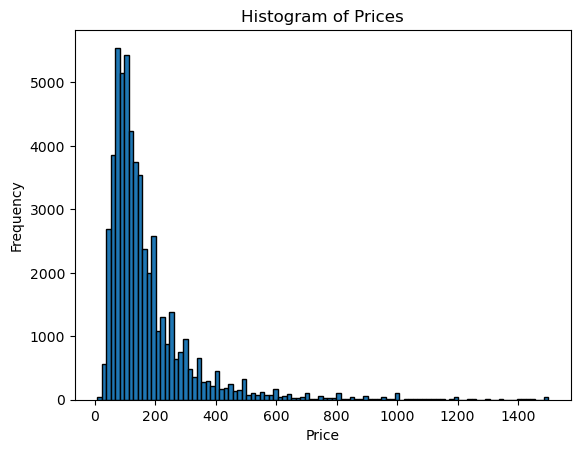

In [67]:
plt.hist(df_September_2023['price'], bins=100, edgecolor='black')
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

In [69]:
categorical_columns = df_September_2023.select_dtypes(include='object').columns
df_September_2023 = pd.get_dummies(df_September_2023, columns=categorical_columns, drop_first=True)

In [71]:
df_September_2023_numeric = df_September_2023.apply(pd.to_numeric, errors='coerce')
df_September_2023_numeric = df_September_2023_numeric.dropna()

In [72]:
df_September_2023 = df_September_2023.dropna()
print(len(df_September_2023))

42870


19. Models

In [73]:
np.random.seed(20180123)

In [77]:
y_september_pred_ols = model_ols_December.predict(X_september)

In [79]:
rmse_september_ols = np.sqrt(mean_squared_error(y_september_true, y_september_pred))
r_squared_september_ols = r2_score(y_september_true, y_september_pred)

In [81]:
print(f'Model Performance on September 2023:')
print(f'RMSE: {rmse_september_ols}')
print(f'R-squared: {r_squared_september_ols}')

Model Performance on September 2023:
RMSE: 118.23458168780486
R-squared: 0.27938972574037413


In [82]:
train_data_Sept, test_data_Sept = train_test_split(df_September_2023, test_size=0.2, random_state=20)
print(len(train_data_Sept)) #for checking

34296


In [83]:
X_train_Sept = train_data_Sept.drop('price', axis=1)
y_train_Sept = train_data_Sept['price']

X_test_Sept = test_data_Sept.drop('price', axis=1)
y_test_Sept = test_data_Sept['price']

# Create and train the OLS regression model
model_ols_Sept = LinearRegression()
model_ols_Sept.fit(X_train_Sept, y_train_Sept)

# Predict on the test set
y_pred_ols_Sept = model_ols_Sept.predict(X_test_Sept)

# Calculate and print the Mean Squared Error
mse_ols_Sept = mean_squared_error(y_test_Sept, y_pred_ols_Sept)
print(f'MSE for OLS: {mse_ols_Sept}')

MSE for OLS: 12072.977395670496


In [86]:
# Create and train the Random Forest regression model
model_rf_Sept = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_Sept.fit(X_train_Sept, y_train_Sept)

# Predict on the test set
y_pred_rf_Sept = model_rf_Sept.predict(X_test_Sept)

# Calculate and print the Mean Squared Error
mse_rf_Sept = mean_squared_error(y_test_Sept, y_pred_rf_Sept)
print(f'MSE for Random Forest: {mse_rf_Sept}')

MSE for Random Forest: 10692.343938338521


In [87]:
model_gb_Sept = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb_Sept.fit(X_train_Sept, y_train_Sept)

# Predict on the test set
y_pred_gb_Sept = model_gb_Sept.predict(X_test_Sept)

# Calculate and print the Mean Squared Error
mse_gb_Sept = mean_squared_error(y_test_Sept, y_pred_gb_Sept)
print(f'MSE for Gradient Boosting: {mse_gb_Sept}')

MSE for Gradient Boosting: 10243.763566117914


In [88]:
results_df_Sept = pd.DataFrame(index=['Linear Regression', 'Random Forest', 'Gradient Boosting'])

# Calculate metrics for each model
for model, y_pred_Sept, name in zip([model_ols_Sept, model_rf_Sept, model_gb_Sept],
                               [y_pred_ols_Sept, y_pred_rf_Sept, y_pred_gb_Sept],
                               results_df_Sept.index):

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test_Sept, y_pred_Sept))

    # Calculate R-squared
    r_squared = r2_score(y_test_Sept, y_pred_Sept)
    
    # Update the results DataFrame
    results_df_Sept.loc[name, 'RMSE'] = rmse
    results_df_Sept.loc[name, 'R-squared'] = r_squared
    
# Print the results DataFrame
print(results_df_Sept)

                         RMSE  R-squared
Linear Regression  109.877101   0.375464
Random Forest      103.403791   0.446884
Gradient Boosting  101.211479   0.470089


In [89]:
n = len(y_test_Sept)
sse = np.sum((y_test_Sept - y_pred_Sept) ** 2)

# Assuming X_test is your feature matrix for the linear model
k = X_test_Sept.shape[1]  
# Calculate BIC
bic_manual = n * np.log(sse / n) + k * np.log(n)

# Update the results DataFrame
results_df_Sept.loc['Linear Regression', 'BIC'] = bic_manual

# Calculate BIC for Random Forest
y_pred_rf_Sept = model_rf_Sept.predict(X_test_Sept)
sse_rf = np.sum((y_test_Sept - y_pred_rf_Sept) ** 2)
k_rf = X_test_Sept.shape[1]
bic_rf = n * np.log(sse_rf / n) + k_rf * np.log(n)
results_df_Sept.loc['Random Forest', 'BIC'] = bic_rf

# Calculate BIC for Gradient Boosting
y_pred_gb_Sept = model_gb_Sept.predict(X_test_Sept)
sse_gb = np.sum((y_test_Sept - y_pred_gb_Sept) ** 2)
k_gb = X_test_Sept.shape[1] 
bic_gb = n * np.log(sse_gb / n) + k_gb * np.log(n)
results_df_Sept.loc['Gradient Boosting', 'BIC'] = bic_gb

print(results_df_Sept)

                         RMSE  R-squared           BIC
Linear Regression  109.877101   0.375464  79583.496555
Random Forest      103.403791   0.446884  79950.968573
Gradient Boosting  101.211479   0.470089  79583.496555


20. SHAP

In [94]:

# Create an explainer object
explainer = shap.Explainer(model)

# Calculate SHAP values for a set of samples
shap_values = explainer.shap_values(X_test_Sept)


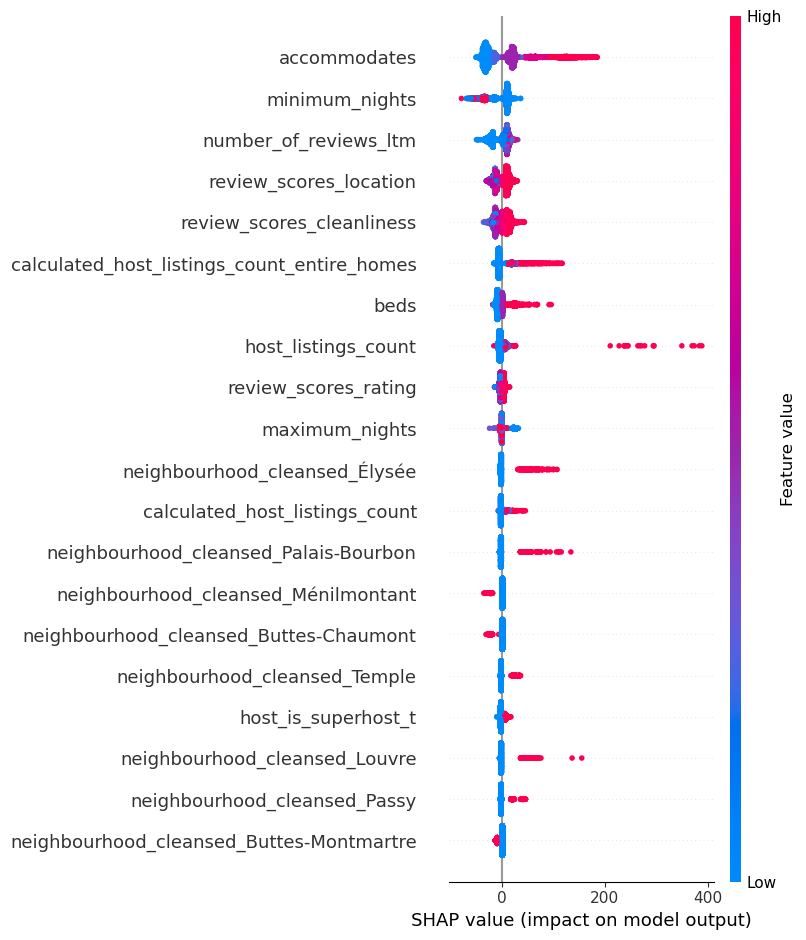

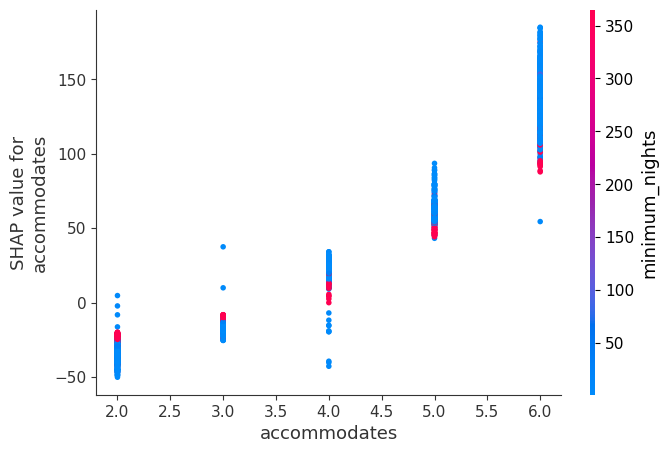

In [97]:
shap.summary_plot(shap_values, X_test_Sept, feature_names=X_test_Sept.columns)
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test_Sept.iloc[0, :])
shap.dependence_plot("accommodates", shap_values, X_test_Sept)
